# Importing the Libraries

In [107]:
# importing the libraries
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
from scipy.cluster import hierarchy as sch
from sklearn.preprocessing import scale
import seaborn as sns
import warnings
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

In [108]:
# Loading the Dataset
data=pd.read_csv("Airline.csv")
pd.options.display.max_rows=99
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [109]:
# checking the data types
data.dtypes

,0
ID#,int64
Balance,int64
Qual_miles,int64
cc1_miles,int64
cc2_miles,int64
cc3_miles,int64
Bonus_miles,int64
Bonus_trans,int64
Flight_miles_12mo,int64
Flight_trans_12,int64


In [110]:
# checking the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [111]:
# checking the stastical summary
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [112]:
# checking the null values
data.isnull().sum()

,0
ID#,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


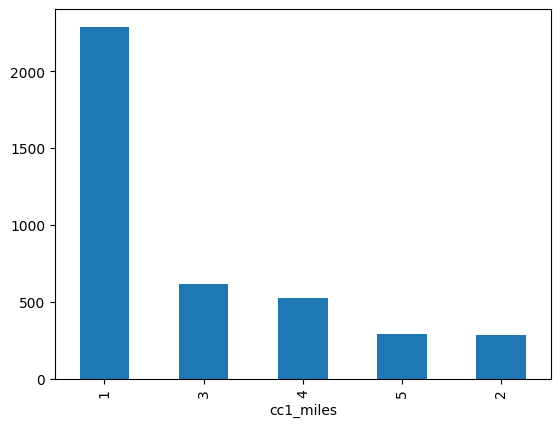

In [113]:
# plotting the Bar chart for catagerical columns
data['cc1_miles'].value_counts().plot(kind='bar')
plt.show()

<Axes: xlabel='cc2_miles'>

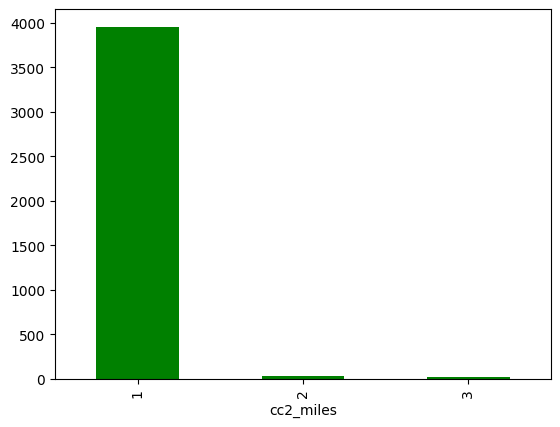

In [114]:
data['cc2_miles'].value_counts().plot(kind='bar',color='Green')

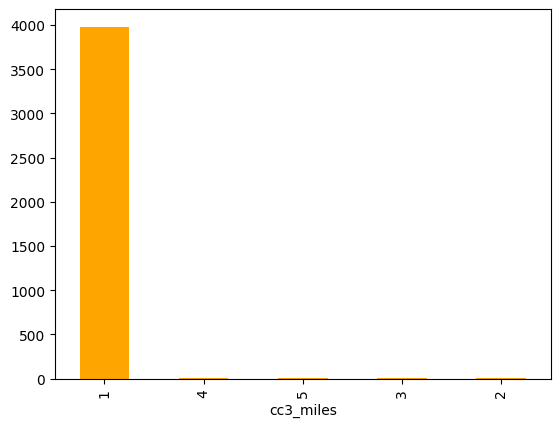

In [115]:
data['cc3_miles'].value_counts().plot(kind='bar',color='orange')
plt.show()

### Here most of the candiates are not traveled,that are getting through the cards(card1,card2,card3).

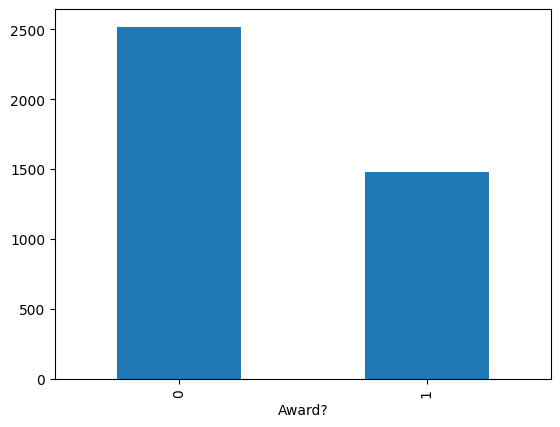

In [116]:
data['Award?'].value_counts().plot(kind='bar')
plt.show()

### Here most of the menbers are not getting the award.

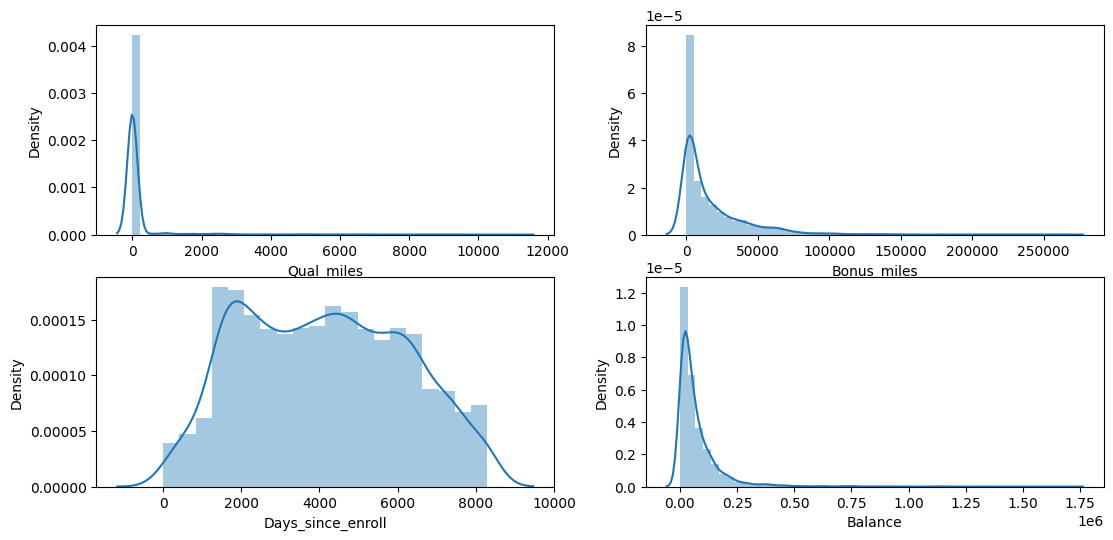

In [117]:
# plotting the histrogram for numric columns
warnings.filterwarnings('ignore')
fig,ax=plt.subplots(figsize=(13,6),nrows=2,ncols=2)
sns.distplot(data['Qual_miles'],ax=ax[0,0])
sns.distplot(data['Bonus_miles'],ax=ax[0,1])
sns.distplot(data['Days_since_enroll'],ax=ax[1,0])
sns.distplot(data['Balance'],ax=ax[1,1])
plt.show()

<Axes: xlabel='Flight_miles_12mo', ylabel='Density'>

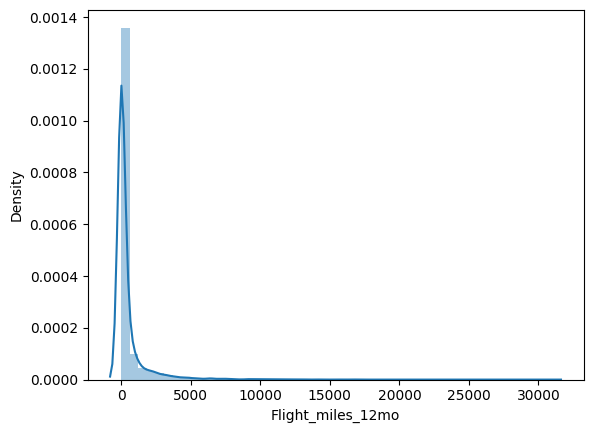

In [118]:
# plotting the histogram for Flight_miles_12mo.
sns.distplot(data['Flight_miles_12mo'])


In [119]:
# calculating the skewness
data[:][['Qual_miles','Balance','Flight_miles_12mo','Days_since_enroll','Bonus_miles']].skew()

,0
Qual_miles,7.512395
Balance,5.004187
Flight_miles_12mo,7.451666
Days_since_enroll,0.120174
Bonus_miles,2.842093


#### Here most of the features are highly postively skewed.

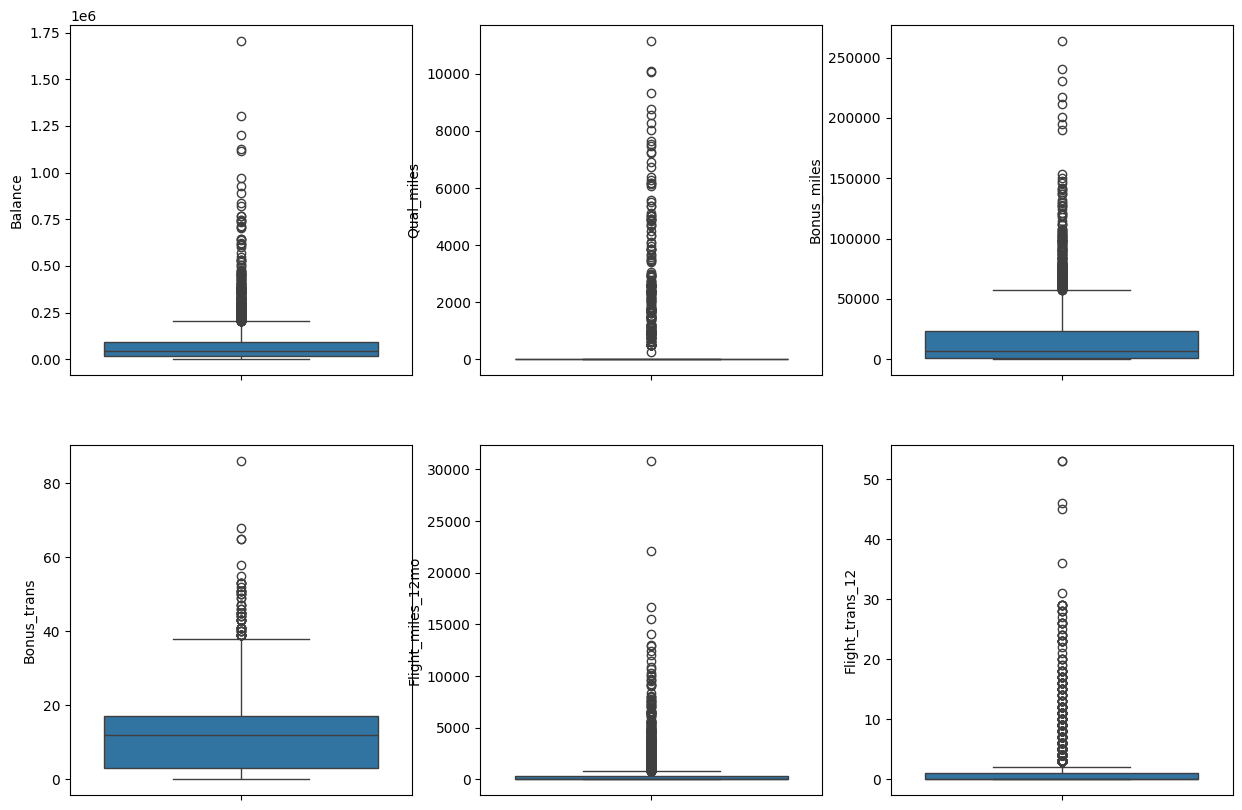

In [120]:
# Boxplot for the numeric columns
fig,ax=plt.subplots(figsize=(15,10),nrows=2,ncols=3)
sns.boxplot(data['Balance'],ax=ax[0,0])
sns.boxplot(data['Qual_miles'],ax=ax[0,1])
sns.boxplot(data['Bonus_miles'],ax=ax[0,2])
sns.boxplot(data['Bonus_trans'],ax=ax[1,0])
sns.boxplot(data['Flight_miles_12mo'],ax=ax[1,1])
sns.boxplot(data['Flight_trans_12'],ax=ax[1,2])
plt.show()

In [121]:
# finding the correlation
corr=data.corr()
corr

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


<Axes: >

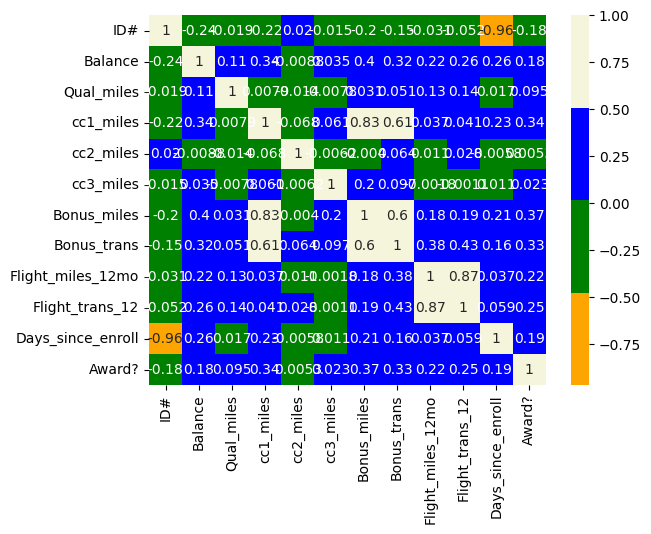

In [122]:
sns.heatmap(corr,annot=True,cmap=['orange','green','Blue','beige'])

### Here Flight_miles_12mo and Flight_trans_12 are strongly correlated, mostly are moderately correlated and few are weakly correlated.

In [123]:
# droping the id Feature, because it is not important
# Here i droped the Flight_trans_12 is correlated
data.drop(["ID#","Flight_trans_12"],axis=1,inplace=True)

In [124]:
# standardizing the columns
data_scal=scale(data)
data=pd.DataFrame(data_scal,columns=data.columns)
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-1.315120,1.303918
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-1.318994,1.303918
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-1.315604,1.303918
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-1.316088,-0.766919


# KMeans Algorithm

In [125]:
# intializing the kmeans
km=KMeans(n_clusters=4).fit(data)
km.inertia_

27511.235041631837

In [126]:
# finding the interia for different clusters
wcss=[]
for K in range(1,21):
  km=KMeans(n_clusters=K).fit(data)
  wcss.append(km.inertia_)
wcss

[39989.99999999989,
 31668.325324017384,
 28856.505633378547,
 27397.35673257527,
 23740.663175366197,
 20835.679677035,
 20375.432875564835,
 16709.675699250733,
 14199.789953977066,
 13385.580726886528,
 12328.154548854207,
 11567.496461625899,
 11474.67774939371,
 10847.832193109458,
 10337.755775974076,
 10381.223242592616,
 9838.608845160268,
 9411.207751069898,
 8871.055834731298,
 8826.3473575392]

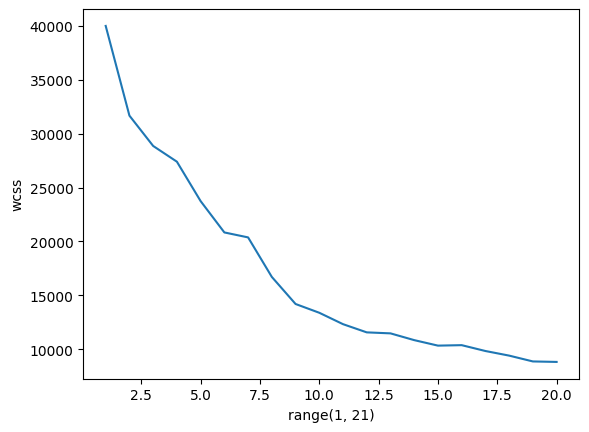

In [127]:
# using the elbow method to find the best k value
plt.plot(range(1,21),wcss)
plt.xlabel(range(1,21))
plt.ylabel('wcss')
plt.show()


In [128]:
# Here i choose k=10 as best k value
km=KMeans(n_clusters=10).fit(data)
km.labels_

array([1, 1, 1, ..., 0, 6, 6], dtype=int32)

In [129]:
data1=km.labels_

In [130]:
# data['K_clust'].value_counts()

# Agglomerative Clustering

In [131]:
# intializing the Agglomerative clustering
Agg_clus=AgglomerativeClustering(n_clusters=10,linkage='single',metric='euclidean')
Agg_clus.fit_predict(data)

array([1, 1, 1, ..., 1, 1, 1])

In [132]:

pd.options.display.max_rows=9999
data1=Agg_clus.labels_
# data['A_clust_s']=data1

In [133]:
# intializing the agglomerative clustering with complete linkage
Agg_clus_c=AgglomerativeClustering(n_clusters=10,linkage='complete',metric='euclidean')
Agg_clus_c.fit_predict(data)
data2=Agg_clus_c.labels_
# data['A_clust_c']=data2

In [134]:
# intializing the agglomerative clustering with mean linkage
Agg_clus_a=AgglomerativeClustering(n_clusters=10,linkage='average',metric='euclidean')
Agg_clus_a.fit_predict(data)
data3=Agg_clus_a.labels_
pd.options.display.max_rows=99
# data['A_clust_a']=data3
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-1.315120,1.303918
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-1.318994,1.303918
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-1.315604,1.303918
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-1.316088,-0.766919


In [135]:
# dic={'kmeans':km.labels_,
#      "Agglo_c":data1}
# pd.DataFrame(dic)

# DBSCAN Algorithm

In [136]:
# intializing the DBSCAN
DB=DBSCAN(eps=3,min_samples=11)
DB.fit(data)

DBSCAN(eps=3, min_samples=11)

In [137]:
clust=DB.labels_
clust

array([0, 0, 0, ..., 0, 0, 0])

In [138]:
# data['DB_clust']=clust
# pd.options.display.max_rows=9999
# data['DB_clust']

In [139]:
# finding the best esp value
nbrs=NearestNeighbors()
nbrs.fit(data)

NearestNeighbors()

In [140]:
# finding the distances and indices
distance,indices=nbrs.kneighbors(data)

In [141]:
# sorting the distances
import numpy as np
distance=np.sort(distance,axis=0)
distance=distance[:,1]

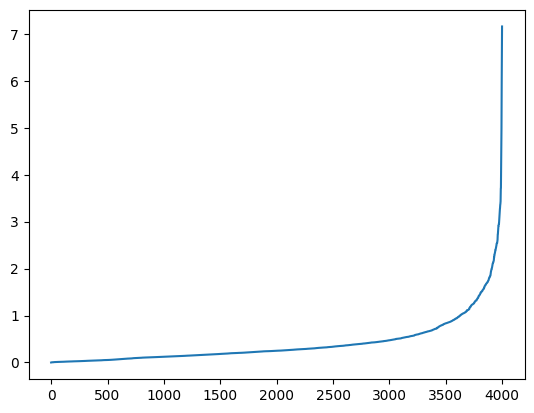

In [142]:
# using the elbow method to finout the best esp value
plt.plot(distance)

### Here, i choose the esp=3 as best value

In [143]:
DB=DBSCAN(eps=3,min_samples=11)
DB.fit(data)

DBSCAN(eps=3, min_samples=11)

In [144]:
DB.labels_

array([0, 0, 0, ..., 0, 0, 0])

# Visualization of Clusters

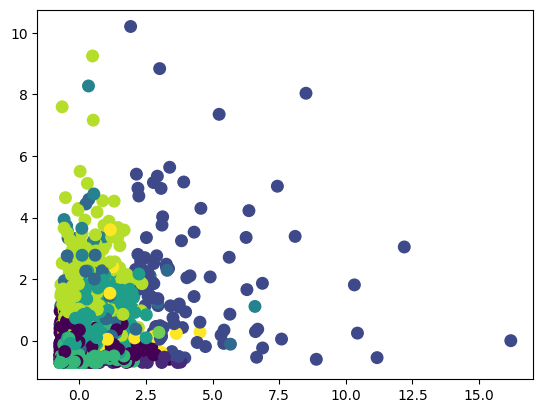

In [145]:
# visualization of the Kmeans clusters
# to plot i choose the Bonus_miles,cc1_miles
plt.scatter(data['Balance'],data['Bonus_miles'],c=km.labels_,s=69)
plt.show()

#### Here the scatter plot looks likes all clusters are overlaped,But when it comes to multidimension space the clusters are segregated.

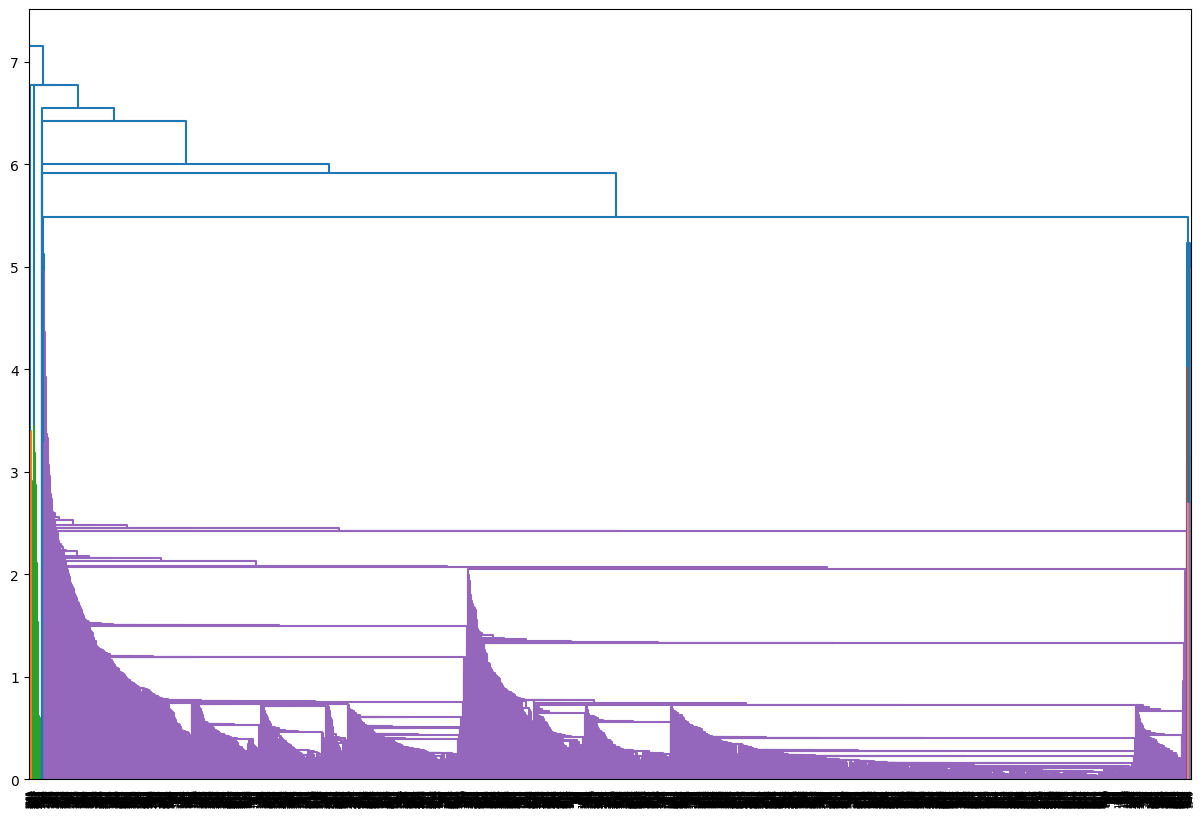

In [146]:
# plotting the dendogram for KMeans
plt.figure(figsize=(15,10))
sch.dendrogram(sch.linkage(data,method='single'))
# help(sch.dendrogram)
plt.show()

### Here,the dendogram looks very clumsy because, we have plotted dendogram for 4000 datapoints.

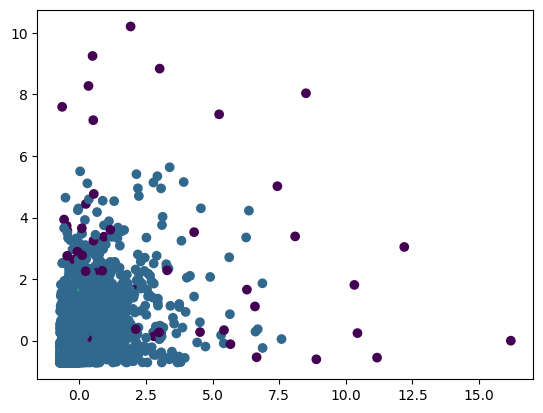

In [147]:
# plotting DBSCAN clusters
plt.scatter(data['Balance'],data['Bonus_miles'],c=DB.labels_)
plt.show()

# Metric Evaluation

In [148]:
# Applying the silhouette score
x=data
x['K_clust']=km.labels_
silhouette_score(x,km.labels_)

np.float64(0.4489239256697699)

In [149]:
# choosing the single linkage
# Because when we compared with algorithms there are merged based on small distance
x.drop('K_clust',axis=1,inplace=True)
x['A_clust']=data1
silhouette_score(x,data1)

np.float64(0.5713764935939437)

In [150]:
x.drop("A_clust",axis=1)
x['DB_clust']=DB.labels_


In [151]:
# calculating the silhouette score
silhouette_score(data,DB.labels_)

np.float64(0.5734993373797553)

# Comparison and Analysis

In [152]:
Dic={'K_clust':km.labels_,
     'A_clust':data1,
     'DB_clust':DB.labels_}
pd.DataFrame(Dic)

,K_clust,A_clust,DB_clust
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,8,1,0
...,...,...,...
3994,0,1,0
3995,0,1,0
3996,0,1,0
3997,6,1,0


#### Here Kmeans and Agglomerative clustering,some data points have same clusters,it's because in agglomerative clustering overlap is happing.
#### In DBSCAN,it's some what different from other cluster algorithms because of it's dense region and outliers.
#### In these case both Kmeans and DBSCAN is peforming good and mostly KMeans is used for these kind of datasets.